In [53]:
import pandas as pd
import numpy as np

#for visualizing:-
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# MODELS
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
#for classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection

#from sklearn.utils import class_weight
#from sklearn.model_selection import

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

In [54]:
df = pd.read_csv("ai_governance_dataset_100k - ai_governance_dataset_100k.csv")
df

,country,year,ai_readiness_score,governance_index,regulatory_framework,sector,ai_maturity_level,investment_millions,num_policies,ethics_score,transparency_index,accountability_score,data_protection_score,innovation_index,public_trust_score
0,Germany,2024,54.84,51.14,Developing,Education,Emerging,1973.02,4,37.13,47.69,38.91,42.71,49.11,42.43
1,USA,2018,45.18,33.60,Developing,Healthcare,Emerging,2790.68,31,29.41,28.62,33.42,34.39,38.35,28.93
2,France,2024,61.28,50.74,Comprehensive,Healthcare,Emerging,1224.63,17,43.93,55.46,49.47,56.76,62.21,41.34
3,Australia,2022,38.72,33.40,Minimal,Manufacturing,Developing,4409.52,25,27.73,26.26,26.76,32.26,32.45,23.32
4,India,2018,41.32,30.68,Comprehensive,Education,Developing,3756.24,14,35.77,34.94,32.62,33.36,33.40,28.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101979,Italy,2018,79.97,67.48,Developing,Government,Advanced,945.29,35,55.79,59.72,58.17,66.51,64.98,49.69
101980,Switzerland,2023,38.81,33.84,Developing,Technology,Developing,3693.35,10,29.08,26.97,27.97,32.37,30.82,28.70
101981,UAE,2022,32.95,24.09,Minimal,Education,Developing,1029.25,6,20.81,25.75,27.25,21.76,28.72,19.27
101982,Italy,2019,40.35,37.58,Developing,Finance,Advanced,734.45,32,29.05,35.18,31.30,33.14,36.49,28.50


In [55]:
df['country'].unique()

array(['Germany', 'USA', 'France', 'Australia', 'India', 'Japan',
       'Switzerland', 'Netherlands', 'UAE', 'Brazil', 'Mexico', 'China',
       'Singapore', 'Spain', 'UK', 'Canada', 'Sweden', 'Italy',
       'South Korea', 'Israel'], dtype=object)

In [56]:
df['regulatory_framework'].unique()

array(['Developing', 'Comprehensive', 'Minimal', 'Basic', 'Moderate', nan],
      dtype=object)

In [57]:
df['sector'].unique()

array(['Education', 'Healthcare', 'Manufacturing', 'Transportation',
       'Government', 'Technology', 'Finance', 'Retail'], dtype=object)

In [58]:
df['ai_maturity_level'].unique()

array(['Emerging', 'Developing', 'Initial', 'Advanced', 'Intermediate'],
      dtype=object)

In [59]:
df.describe(include=["O"]).T

,count,unique,top,freq
country,101984,20,Italy,5270
regulatory_framework,98929,5,Minimal,19960
sector,101984,8,Transportation,12866
ai_maturity_level,101984,5,Intermediate,20529


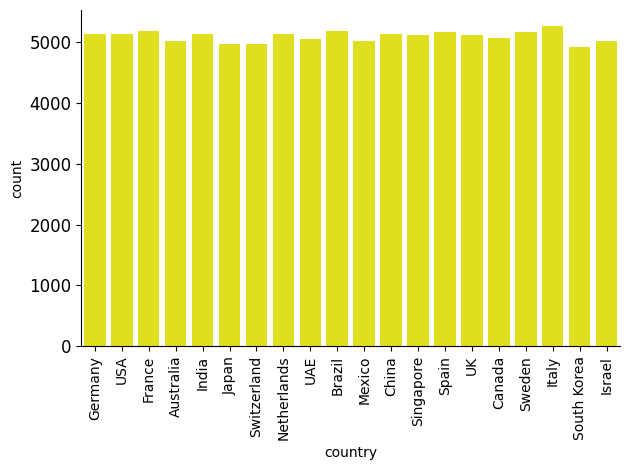

In [60]:
sns.countplot(x=df["country"],color="yellow")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

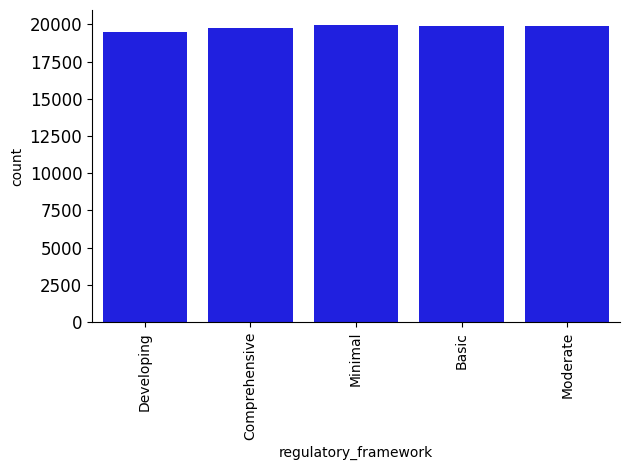

In [61]:
sns.countplot(x=df["regulatory_framework"],color="blue")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

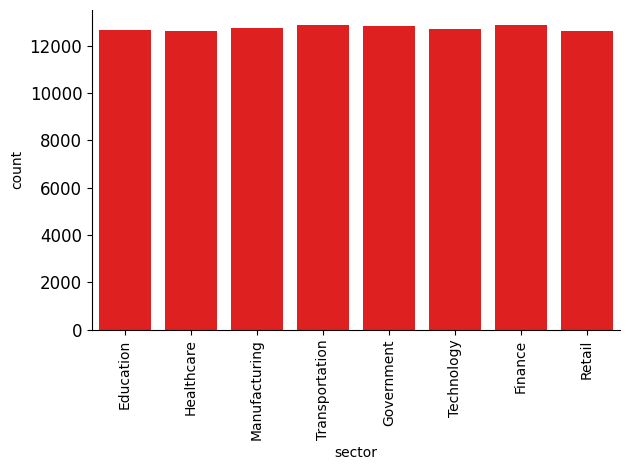

In [62]:
sns.countplot(x=df["sector"],color="red")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

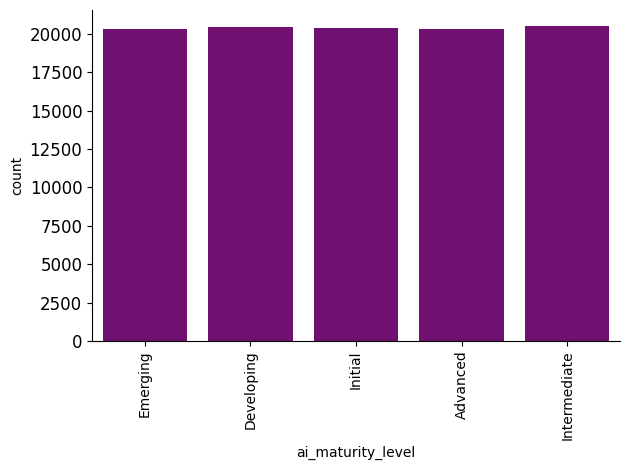

In [63]:
sns.countplot(x=df["ai_maturity_level"],color="purple")
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
sns.despine(top=True,right=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101984 entries, 0 to 101983
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                101984 non-null  object 
 1   year                   101984 non-null  int64  
 2   ai_readiness_score     96816 non-null   float64
 3   governance_index       101984 non-null  float64
 4   regulatory_framework   98929 non-null   object 
 5   sector                 101984 non-null  object 
 6   ai_maturity_level      101984 non-null  object 
 7   investment_millions    97865 non-null   float64
 8   num_policies           101984 non-null  int64  
 9   ethics_score           101984 non-null  float64
 10  transparency_index     101984 non-null  float64
 11  accountability_score   101984 non-null  float64
 12  data_protection_score  95928 non-null   float64
 13  innovation_index       101984 non-null  float64
 14  public_trust_score     101984 non-nu

In [65]:
# shape of the dataset
df.shape

(101984, 15)

In [66]:
# find duplicates
df.duplicated().sum()

1984

In [67]:
# drop duplicates
df = df.drop_duplicates()

In [68]:
df.duplicated().sum()

0

In [69]:
# find null values on the dataset
df.isnull().sum()

country                     0
year                        0
ai_readiness_score       5056
governance_index            0
regulatory_framework     3000
sector                      0
ai_maturity_level           0
investment_millions      4033
num_policies                0
ethics_score                0
transparency_index          0
accountability_score        0
data_protection_score    5935
innovation_index            0
public_trust_score          0
dtype: int64

In [70]:
# Numeric columns → fill with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

C:\Users\User\AppData\Local\Temp\ipykernel_11536\2296084190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [71]:
# Categorical columns → fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

C:\Users\User\AppData\Local\Temp\ipykernel_11536\1164969716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].fillna(df[c].mode()[0])


In [72]:
df.isnull().sum()

country                  0
year                     0
ai_readiness_score       0
governance_index         0
regulatory_framework     0
sector                   0
ai_maturity_level        0
investment_millions      0
num_policies             0
ethics_score             0
transparency_index       0
accountability_score     0
data_protection_score    0
innovation_index         0
public_trust_score       0
dtype: int64

In [73]:
df.dtypes

country                   object
year                       int64
ai_readiness_score       float64
governance_index         float64
regulatory_framework      object
sector                    object
ai_maturity_level         object
investment_millions      float64
num_policies               int64
ethics_score             float64
transparency_index       float64
accountability_score     float64
data_protection_score    float64
innovation_index         float64
public_trust_score       float64
dtype: object

In [74]:
le = LabelEncoder()

In [75]:
df['country'] = le.fit_transform(df['country'])
df['regulatory_framework'] = le.fit_transform(df['regulatory_framework'])
df['sector'] = le.fit_transform(df['sector'])
df['ai_maturity_level'] = le.fit_transform(df['ai_maturity_level'])


C:\Users\User\AppData\Local\Temp\ipykernel_11536\2603120312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = le.fit_transform(df['country'])
C:\Users\User\AppData\Local\Temp\ipykernel_11536\2603120312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regulatory_framework'] = le.fit_transform(df['regulatory_framework'])
C:\Users\User\AppData\Local\Temp\ipykernel_11536\2603120312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [76]:
df.dtypes

country                    int32
year                       int64
ai_readiness_score       float64
governance_index         float64
regulatory_framework       int32
sector                     int32
ai_maturity_level          int32
investment_millions      float64
num_policies               int64
ethics_score             float64
transparency_index       float64
accountability_score     float64
data_protection_score    float64
innovation_index         float64
public_trust_score       float64
dtype: object

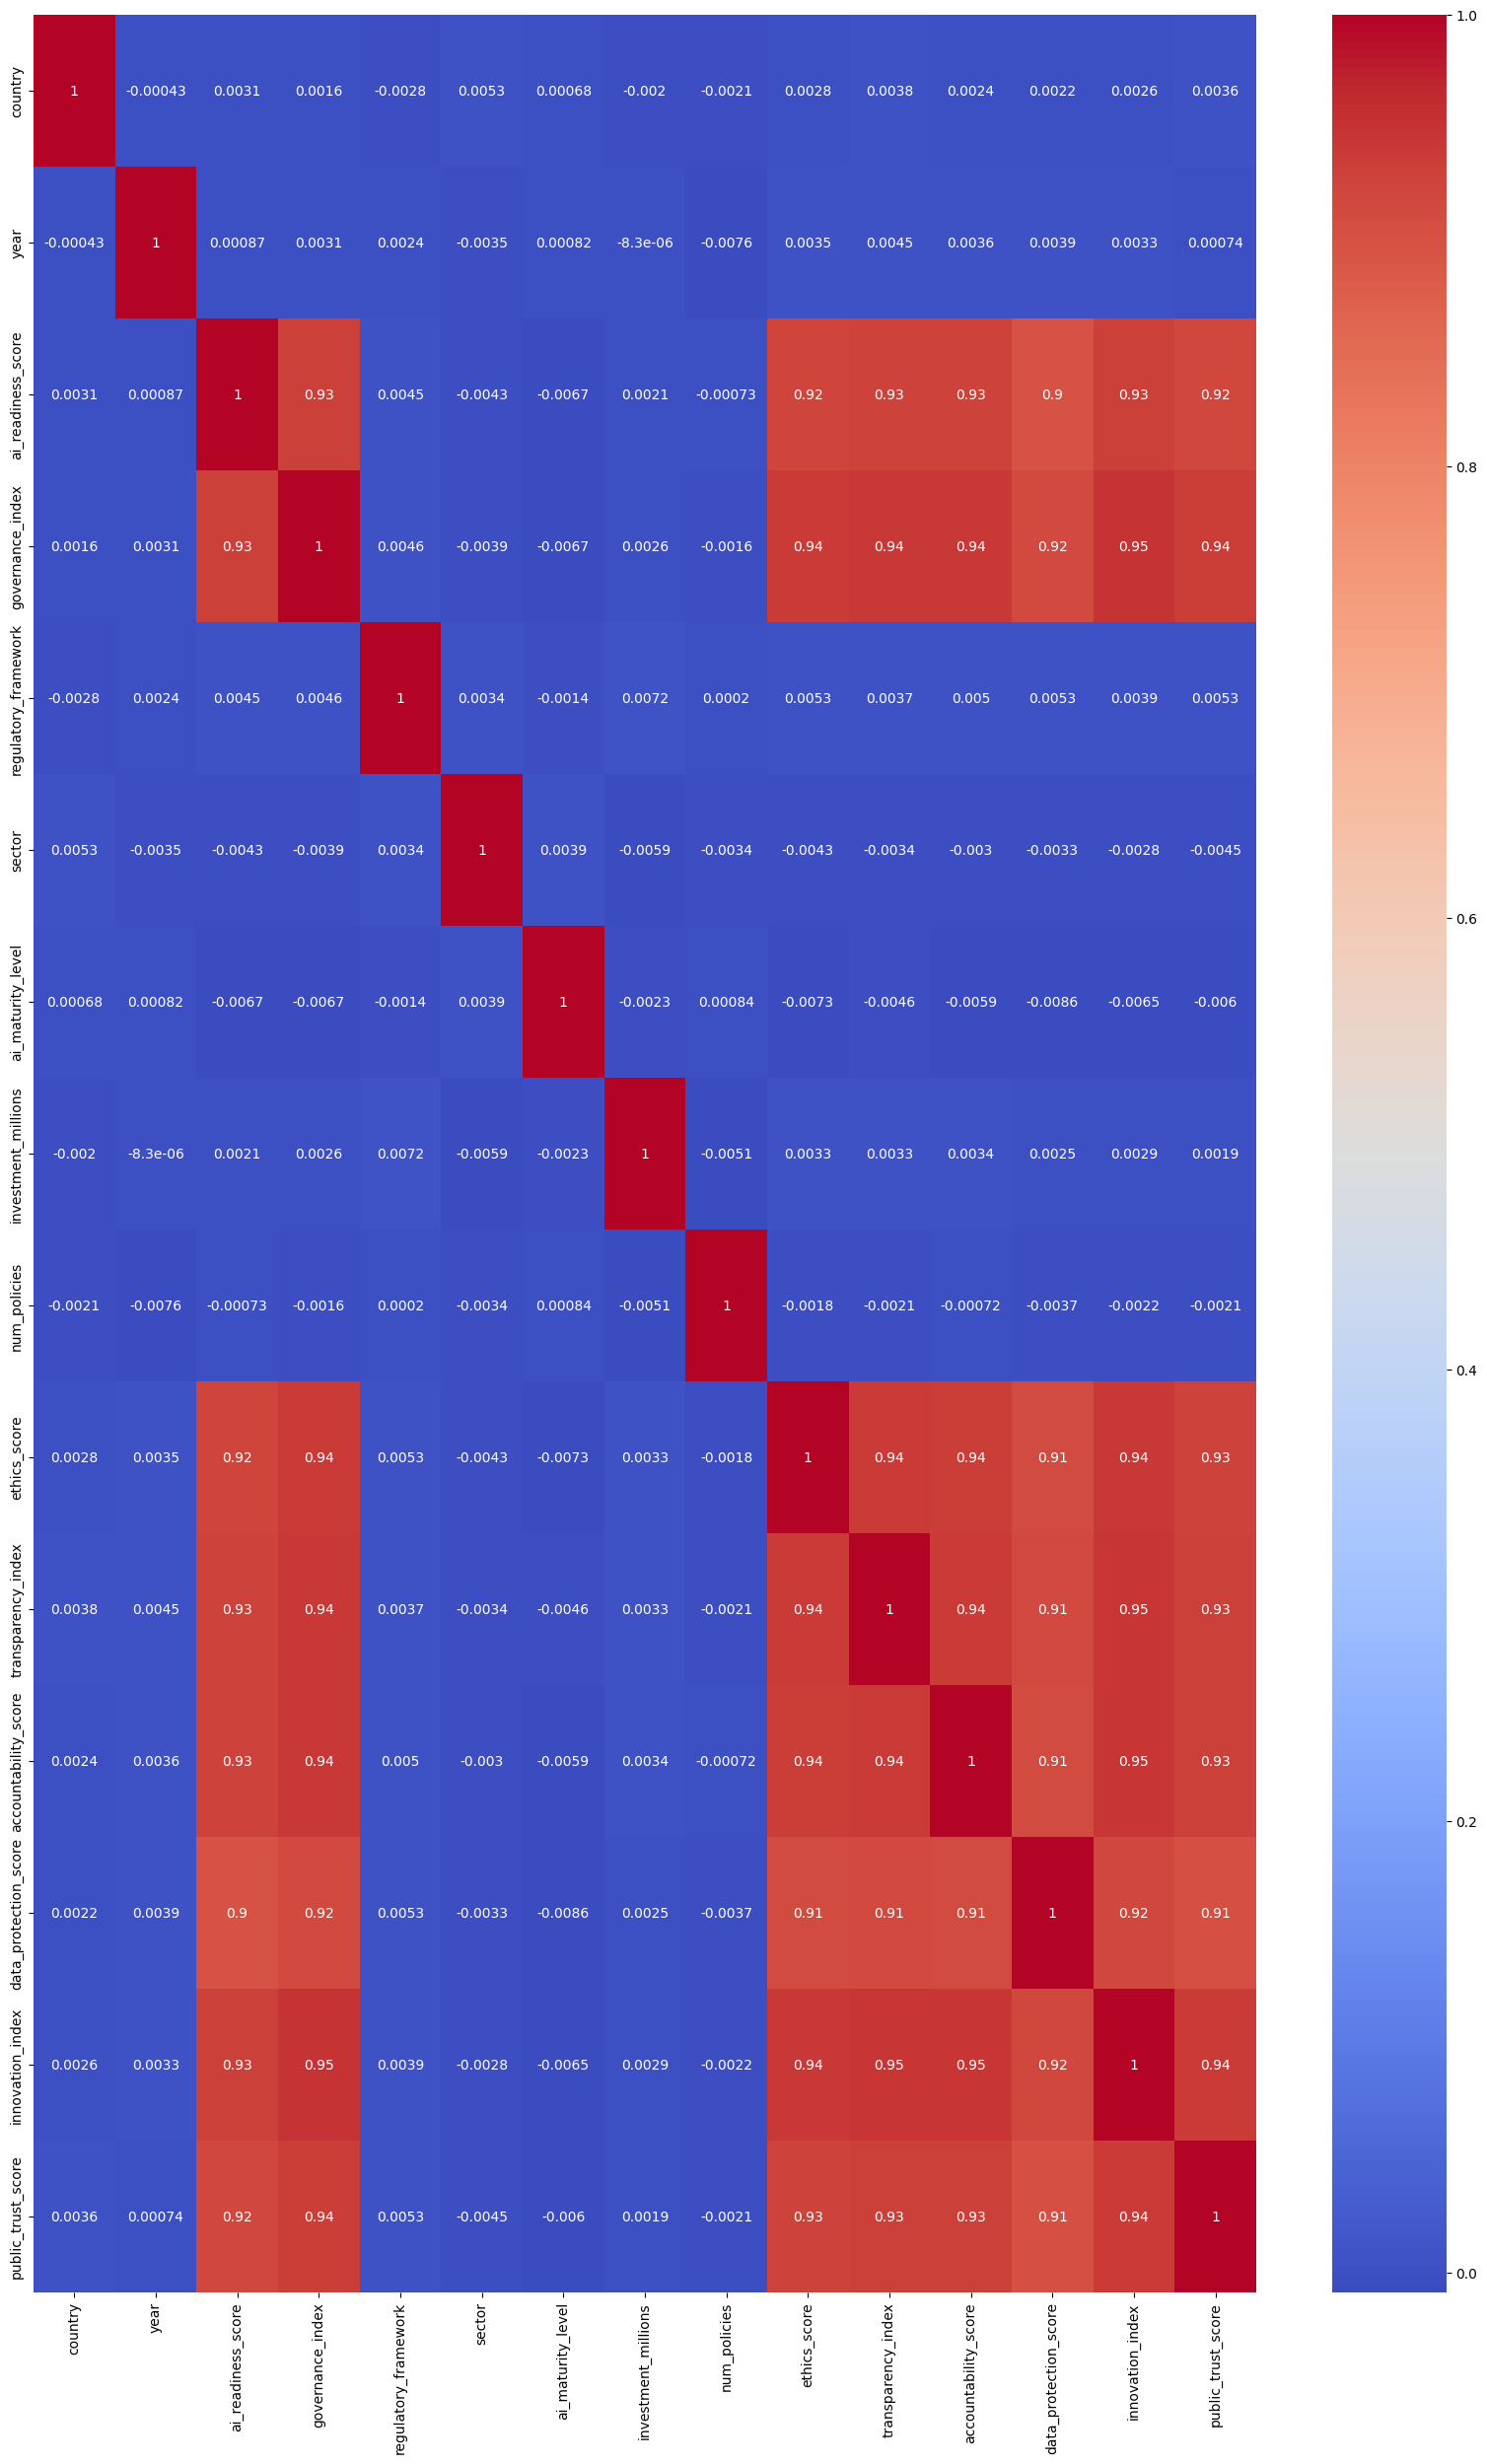

In [77]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [78]:
df = df.drop(['ethics_score'],axis=1)

In [79]:
df = df.drop(['ai_readiness_score'],axis=1)

In [80]:
df = df.drop(['transparency_index'],axis=1)

In [81]:
df = df.drop(['accountability_score'],axis=1)

In [82]:
df = df.drop(['innovation_index'],axis=1)

In [83]:
df = df.drop(['data_protection_score'],axis=1)

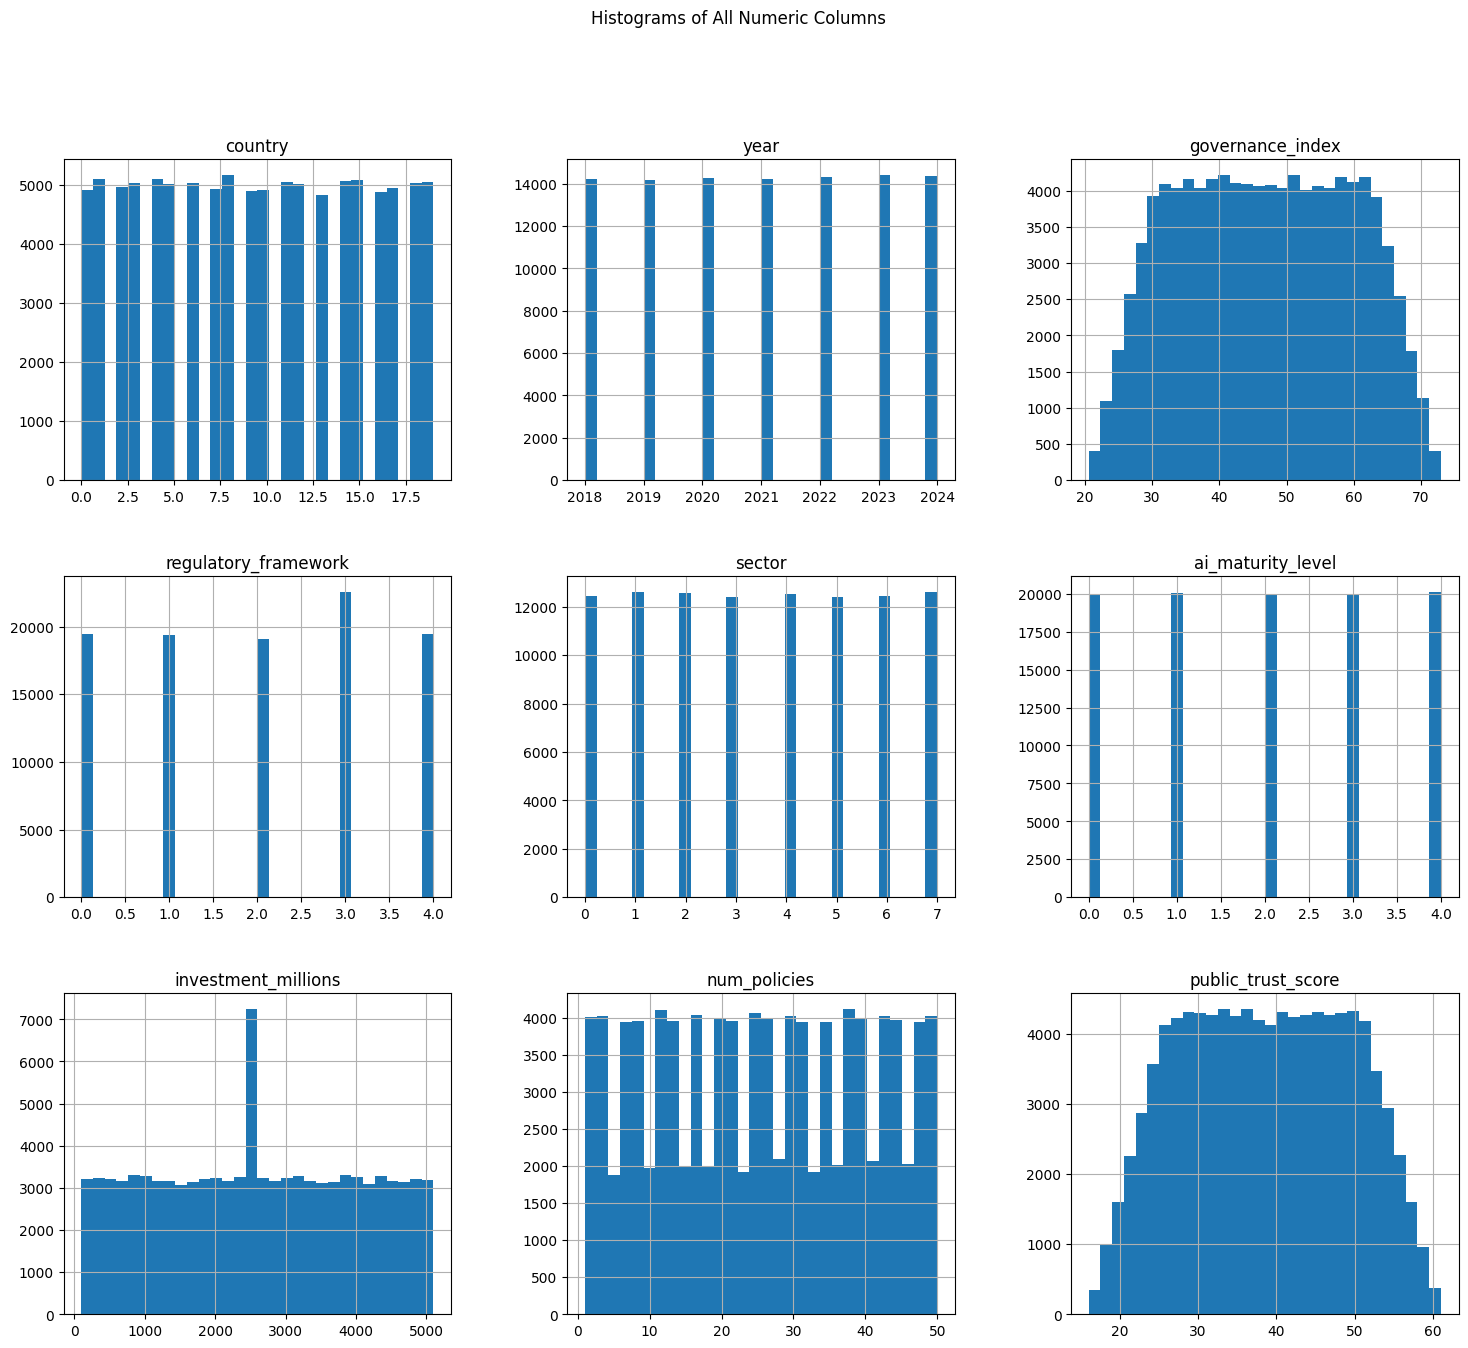

In [84]:
df.hist(figsize=(18, 15), bins=30)
plt.suptitle("Histograms of All Numeric Columns")
plt.show()

In [85]:
df.skew()

country                 0.005584
year                   -0.007359
governance_index        0.001142
regulatory_framework   -0.057773
sector                  0.003872
ai_maturity_level      -0.001970
investment_millions    -0.001070
num_policies           -0.004485
public_trust_score      0.000042
dtype: float64

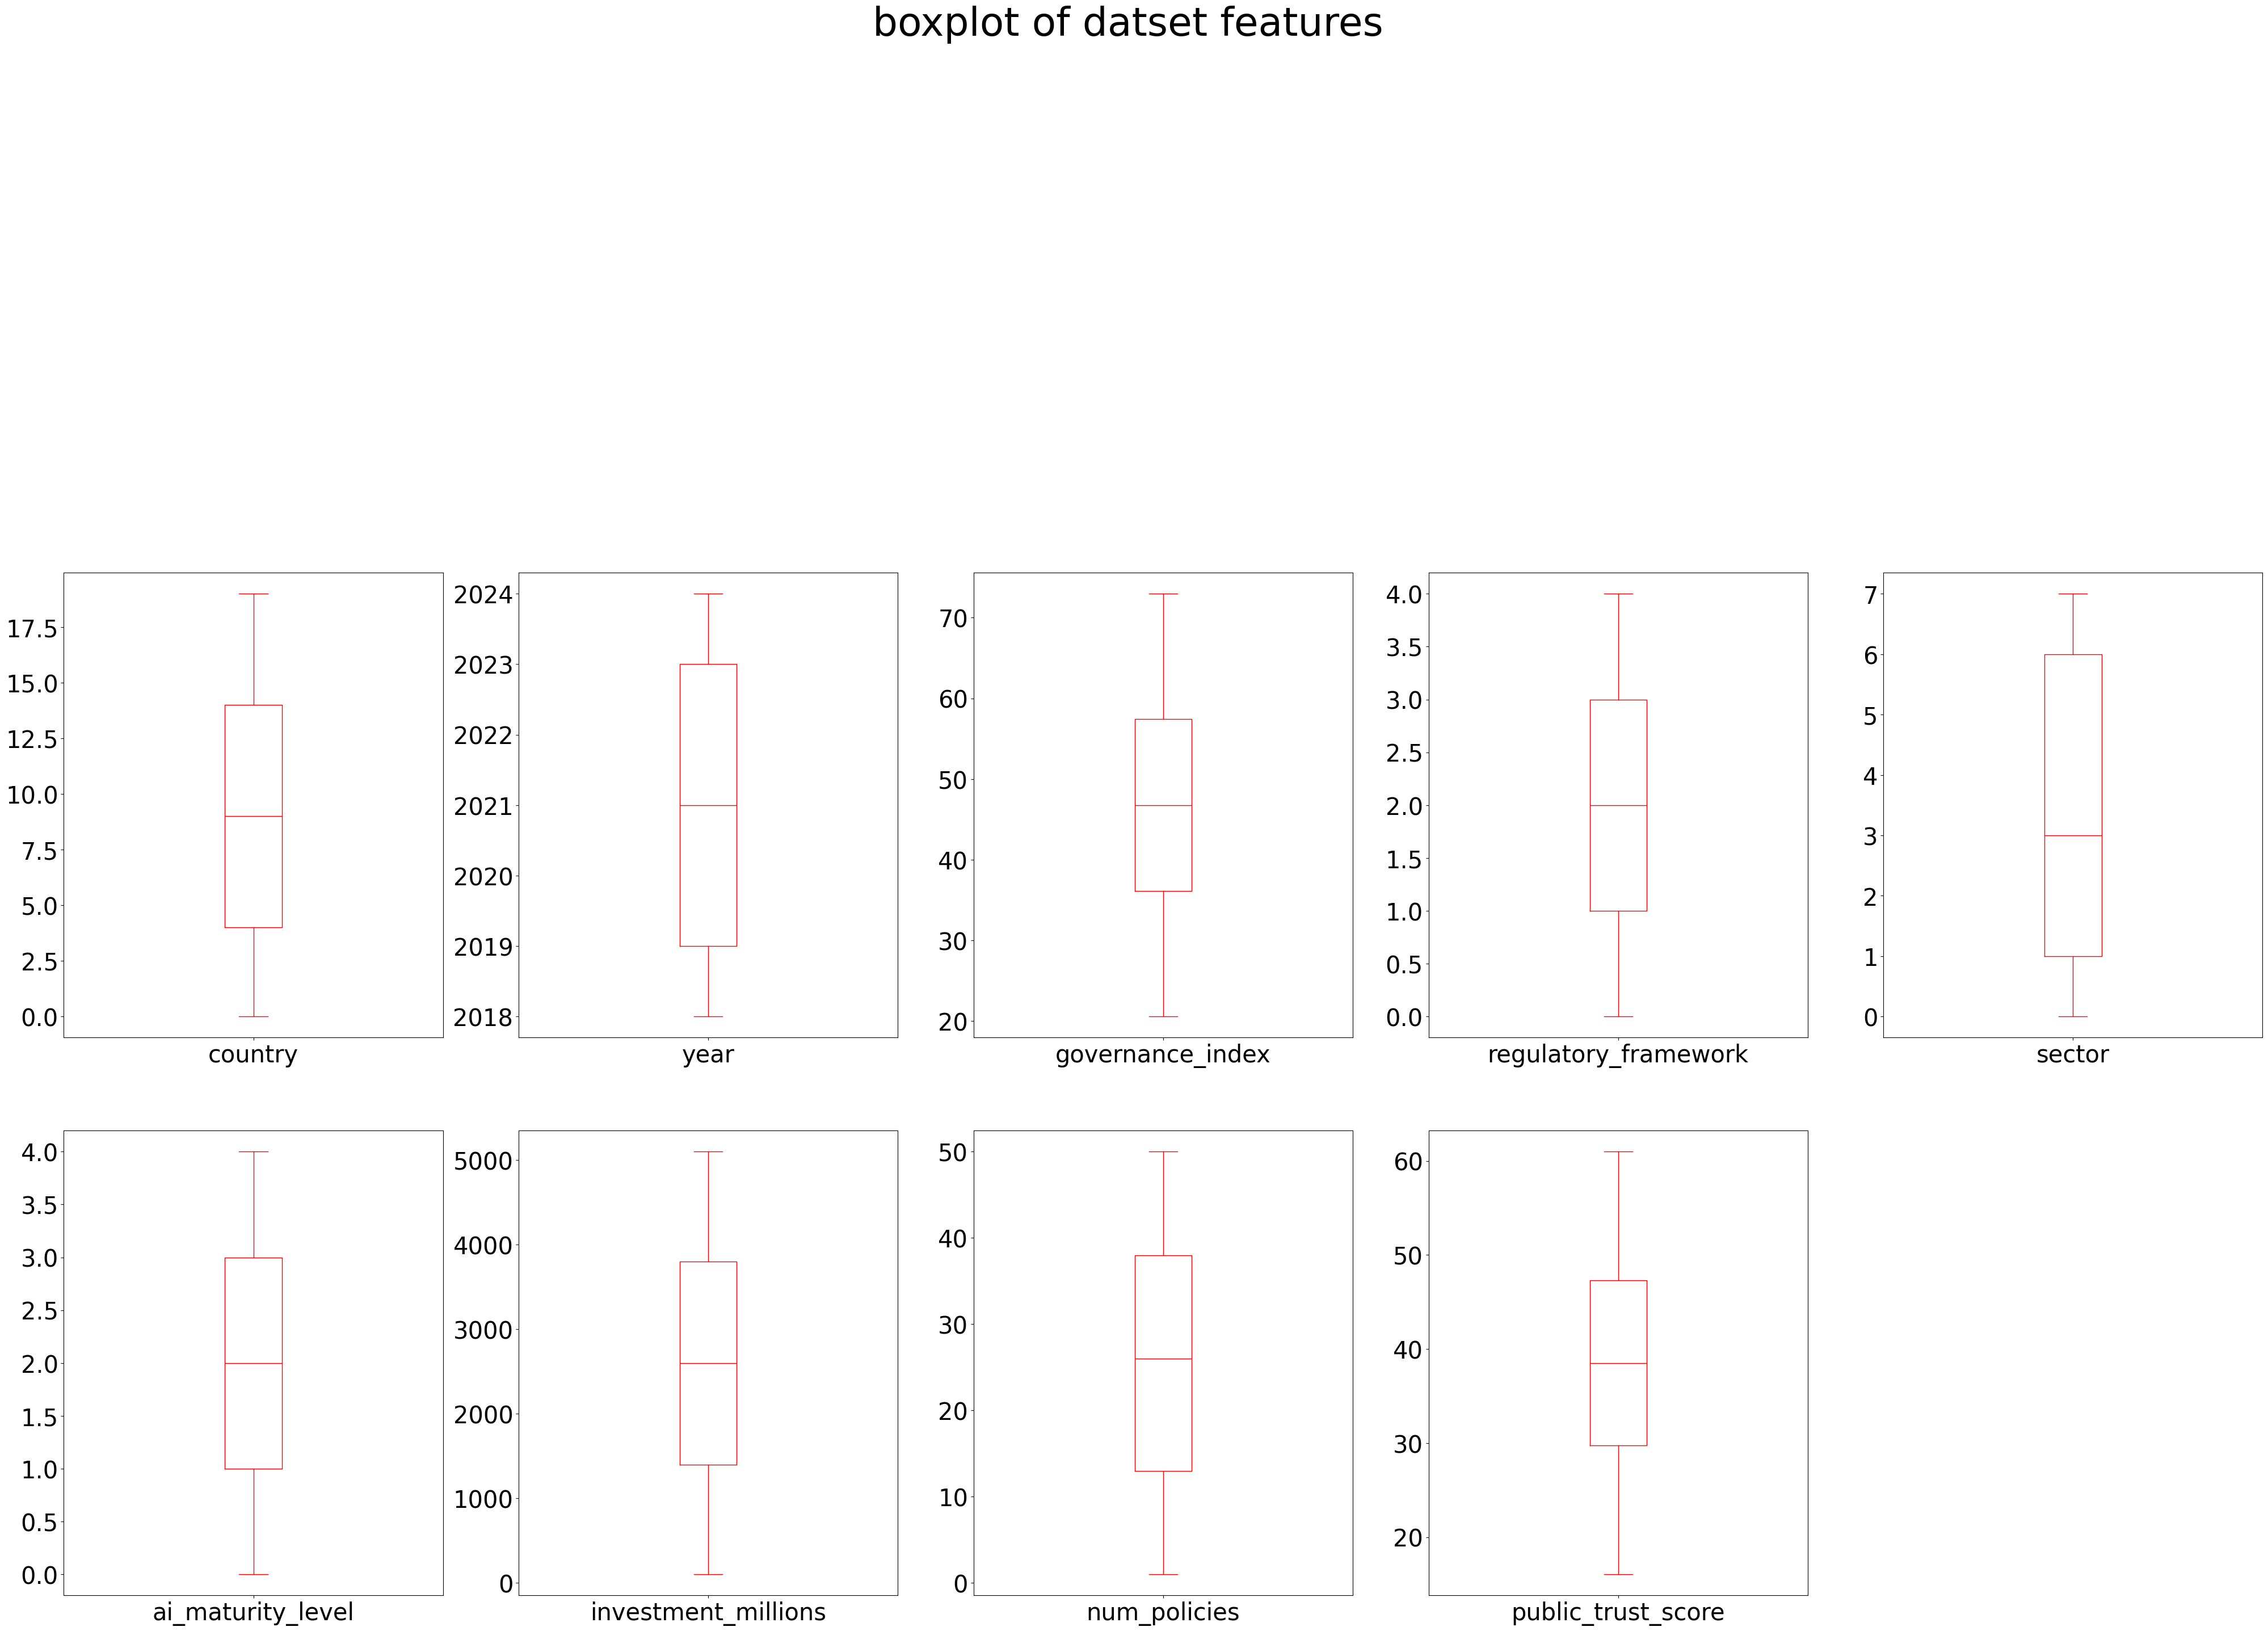

In [86]:
df.plot(kind='box',subplots=True,layout=(8,5),figsize=(50,100),color='red',fontsize=30)
plt.suptitle('boxplot of datset features',fontsize=50)
plt.show()

In [87]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [88]:
X = df.drop("governance_index", axis=1)
y = df["governance_index"]


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = model.predict(X_test)

In [92]:
print('mse:',mean_squared_error(y_test,y_pred))
print('r2_score:',r2_score(y_test,y_pred))
print('mae:',mean_absolute_error(y_test,y_pred))

mse: 19.632362313706736
r2_score: 0.8786127595116155
mae: 3.6131016112094816


In [93]:
# models={"Linear_Regression":LinearRegression(),
#         "RandomForest_Regressor":RandomForestRegressor(),
#         "GradientBoosting_Regressore":GradientBoostingRegressor(),
#         "DecisionTree_Regressor":DecisionTreeRegressor(),
#         "svm":SVR()}

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42),
}

In [95]:
#Dictionary to store results
results={'Model':[],'MSE':[],'MAE':[],'R2':[]}

#Loop through the models ,train them and calculate the matrics
for model_name,model in models.items():
    #TRAIN THE MODEL
    model.fit(X_train,y_train)

    #make predictions
    y_pred=model.predict(X_test)

    #calculate metrics
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    #store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R2'].append(r2)

#convert results to a DataFrame
results_df=pd.DataFrame(results)

#Sidplay the results
results_df

,Model,MSE,MAE,R2
0,LinearRegression,19.632362,3.613102,0.878613
1,Ridge,19.632362,3.613102,0.878613
2,DecisionTree,39.879369,5.091344,0.753425
3,RandomForest,19.778179,3.615748,0.877711


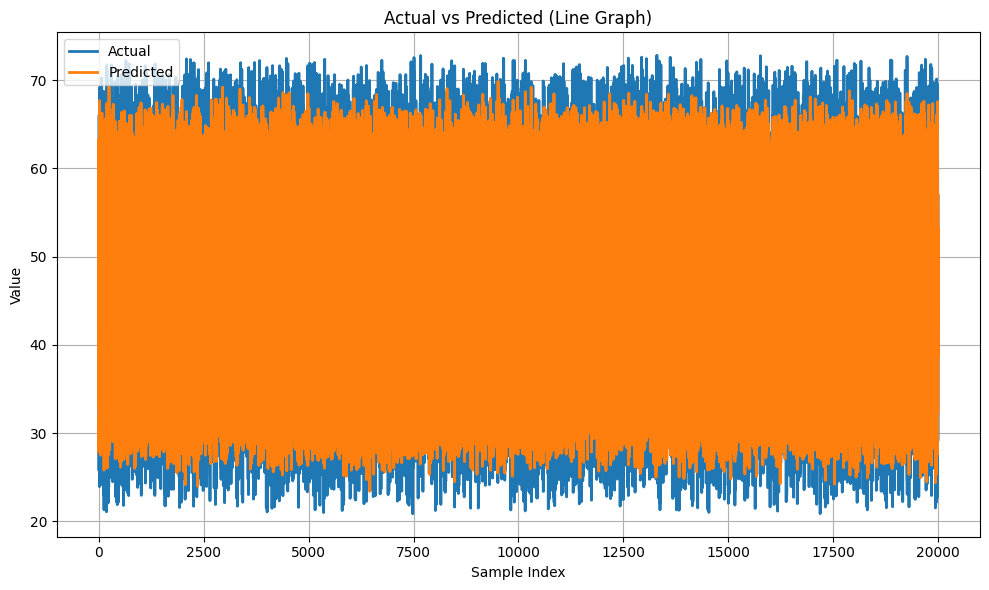

In [96]:
plt.figure(figsize=(10,6))

plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2)

plt.title("Actual vs Predicted (Line Graph)")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## save the model 

In [97]:
import pickle

In [ ]:
pickle.dump(model, open("model.pkl", "wb"))